# **Project Name**    - 



##### **Project Type**    - Classification
##### **Contribution**    - Individual
##### **Team Member 1 -**
##### **Team Member 2 -**
##### **Team Member 3 -**
##### **Team Member 4 -**

# **Project Summary -**

Write the summary here within 500-600 words.

Prediction of bankruptcy is a phenomenon of increasing interest to firms who stand to lose money because of unpaid debts. Since computers can store huge data sets pertaining to bankruptcy, making accurate predictions from them beforehand is becoming important. The data were collected from the Taiwan Economic Journal for the years 1999 to 2009. Company bankruptcy was defined based on the business regulations of the Taiwan Stock Exchange. In this project you will use various classification algorithms on bankruptcy dataset to predict bankruptcies with satisfying accuracies long before the actual event.

# **GitHub Link -**

Provide your GitHub Link here.

https://github.com/kaushikk1999/Company-Bankruptcy-Prediction.git

# **Problem Statement**


**Write Problem Statement Here.**

In today's competitive business environment, it is crucial for investors, lenders, and stakeholders to accurately assess the financial health and stability of companies they are involved with or considering investing in. Bankruptcy is a severe financial event that can have far-reaching consequences, including loss of investments, job cuts, and economic instability. Therefore, there is a pressing need to develop effective predictive models that can identify the warning signs of company bankruptcy in advance.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries


import matplotlib.pyplot as plt                        # visualize with plots
%matplotlib inline
import seaborn as sns
plt.style.use('seaborn-white')
import plotly.express as px 
import numpy as np
import pandas as pd

from datetime import datetime                          # to convert to date
from statsmodels.tsa.arima_model import ARIMA          # to build ARIMA
#from fbprophet import Prophet                          # to build prophet

from dateutil.relativedelta import relativedelta       # working with dates with style
from datetime import datetime                          # computational cost
from scipy.optimize import minimize                    # for function minimization
import copy                                            # create copies

from sklearn.preprocessing import (MinMaxScaler,       # scale the data
StandardScaler)         
from sklearn.model_selection import train_test_split   # split train and test data
from sklearn.model_selection import (cross_val_score,  # split train and test data on a timeseries
TimeSeriesSplit)

from sklearn.linear_model import LinearRegression      # regression model
from xgboost import XGBRegressor                       # xgboost model
from sklearn.ensemble import RandomForestRegressor     # random forest model
from sklearn.svm import SVR                            # support vector regressor
from sklearn.linear_model import (Lasso, Ridge,        # regularization
ElasticNet, LassoCV, RidgeCV, ElasticNetCV)
from sklearn.model_selection import GridSearchCV       # grid search to optimize parameters

from sklearn.metrics import (r2_score,                 # import required metrics
mean_squared_error,  mean_absolute_percentage_error, 
mean_absolute_error)

from statsmodels.tsa.stattools import adfuller         # statistics and econometrics
import statsmodels.formula.api as smf                  
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs
import warnings

# Ignore warning messages
warnings.filterwarnings('ignore')

# Your code generating the warning

# Reset warning behavior (optional)
warnings.resetwarnings()

# To supress warnings
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Basic Libraries for Data organization, Statistical operations and Plotting
import numpy as np
import pandas as pd
%matplotlib inline
# For loading .arff files
from scipy.io import arff
# To analyze the type of missing data
import missingno as msno
# Library for performing k-NN and MICE imputations 
import fancyimpute
# Library to perform Expectation-Maximization (EM) imputation
import impyute as impy
# To perform mean imputation
#from sklearn.preprocessing import Imputer
from sklearn.impute import SimpleImputer
#To perform kFold Cross Validation
from sklearn.model_selection import KFold
# Formatted counter of class labels
from collections import Counter
# Ordered Dictionary
from collections import OrderedDict
# Library imbalanced-learn to deal with the data imbalance. To use SMOTE oversampling
from imblearn.over_sampling import SMOTE 

# Impoting classification models
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

import random

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from bokeh.plotting import figure, show
from bokeh.io import push_notebook
import ipywidgets
from scipy.stats import norm

C:\Users\yokau\AppData\Local\Temp\ipykernel_24748\2766190660.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


### Dataset Loading

In [3]:
# Load Dataset
df=  pd.read_csv(r'COMPANY BANKRUPTCY PREDICTION.csv')
#from google.colab import drive
#drive.mount('/content/drive')

In [4]:
#df=pd.read_csv('/content/drive/MyDrive/data_YesBank_StockPrices.csv')

### Dataset First View

In [5]:
# Dataset First Look
df

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,0,0.493687,0.539468,0.543230,0.604455,0.604462,0.998992,0.797409,0.809331,0.303510,...,0.799927,0.000466,0.623620,0.604455,0.840359,0.279606,0.027064,0.566193,1,0.029890
6815,0,0.475162,0.538269,0.524172,0.598308,0.598308,0.998992,0.797414,0.809327,0.303520,...,0.799748,0.001959,0.623931,0.598306,0.840306,0.278132,0.027009,0.566018,1,0.038284
6816,0,0.472725,0.533744,0.520638,0.610444,0.610213,0.998984,0.797401,0.809317,0.303512,...,0.797778,0.002840,0.624156,0.610441,0.840138,0.275789,0.026791,0.565158,1,0.097649
6817,0,0.506264,0.559911,0.554045,0.607850,0.607850,0.999074,0.797500,0.809399,0.303498,...,0.811808,0.002837,0.623957,0.607846,0.841084,0.277547,0.026822,0.565302,1,0.044009


### Dataset Rows & Columns count

In [6]:
# Dataset Rows & Columns count
df.shape

(6819, 96)

### Dataset Information

In [7]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

#### Duplicate Values

In [8]:
# Dataset Duplicate Value Count
len(df[df.duplicated()])

0

#### Missing Values/Null Values

In [9]:
# Missing Values/Null Values Count

df.isnull().sum()

Bankrupt?                                                   0
 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
 Operating Gross Margin                                     0
                                                           ..
 Liability to Equity                                        0
 Degree of Financial Leverage (DFL)                         0
 Interest Coverage Ratio (Interest expense to EBIT)         0
 Net Income Flag                                            0
 Equity to Liability                                        0
Length: 96, dtype: int64

<Axes: >

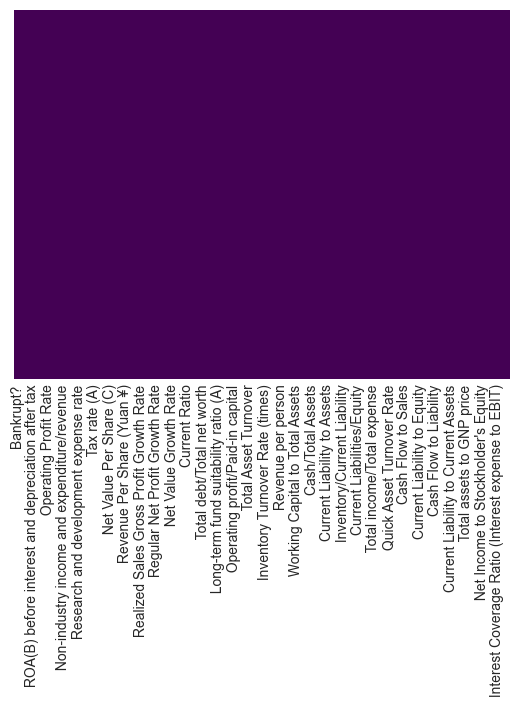

In [10]:
# Visualizing the missing values

sns.heatmap(df.isnull(), cmap='viridis', cbar=False, yticklabels=False)

### What did you know about your dataset?

Answer Here

there is no null values in dataset

## ***2. Understanding Your Variables***

In [11]:
# Dataset Describe
df.describe(include='all')

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,...,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,...,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,1.0,0.047578
std,0.176710,0.060686,0.065620,0.061595,0.016934,0.016916,0.013010,0.012869,0.013601,0.011163,...,0.040332,3.764501e+08,0.012290,0.016934,0.014523,0.014463,0.015668,0.013214,0.0,0.050014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,0.000000,0.476527,0.535543,0.527277,0.600445,0.600434,0.998969,0.797386,0.809312,0.303466,...,0.796750,9.036205e-04,0.623636,0.600443,0.840115,0.276944,0.026791,0.565158,1.0,0.024477
50%,0.000000,0.502706,0.559802,0.552278,0.605997,0.605976,0.999022,0.797464,0.809375,0.303525,...,0.810619,2.085213e-03,0.623879,0.605998,0.841179,0.278778,0.026808,0.565252,1.0,0.033798
75%,0.000000,0.535563,0.589157,0.584105,0.613914,0.613842,0.999095,0.797579,0.809469,0.303585,...,0.826455,5.269777e-03,0.624168,0.613913,0.842357,0.281449,0.026913,0.565725,1.0,0.052838
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,9.820000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000


### Variables Description 

Answer Here

Bankrupt?: Binary label indicating whether the company went bankrupt (1) or not (0).

ROA(C) before interest and depreciation before interest: Return on Assets (ROA) before interest and depreciation before interest.

ROA(A) before interest and % after tax: Return on Assets (ROA) before interest and after tax.

ROA(B) before interest and depreciation after tax: Return on Assets (ROA) before interest and depreciation after tax.

Operating Gross Margin: Operating Gross Margin.

Realized Sales Gross Margin: Realized Sales Gross Margin.

Operating Profit Rate: Operating Profit Rate.

Pre-tax net Interest Rate: Pre-tax net Interest Rate.

After-tax net Interest Rate: After-tax net Interest Rate.

Non-industry income and expenditure/revenue: Non-industry income and expenditure to revenue ratio.

... (Columns 10 to 95): Additional financial and non-financial features. Please note that the specific details and names of these columns are not provided in the dataset.

Net Income to Total Assets: Net Income to Total Assets ratio.

Total assets to GNP price: Total assets to Gross National Product (GNP) price ratio.

No-credit Interval: No-credit Interval.

Gross Profit to Sales: Gross Profit to Sales ratio.

Net Income to Stockholder's Equity: Net Income to Stockholder's Equity ratio.

Liability to Equity: Liability to Equity ratio.

Degree of Financial Leverage (DFL): Degree of Financial Leverage.

Interest Coverage Ratio (Interest expense to EBIT): Interest Coverage Ratio.

Net Income Flag: Binary flag indicating the presence of net income (1) or not (0).

Equity to Liability: Equity to Liability ratio.

### Check Unique Values for each variable.

In [12]:
# Check Unique Values for each variable.


import pandas as pd

def display_unique_values(df):
    for column in df.columns:
        unique_values = df[column].unique()
        print(f"Column: {column}")
        print(f"Unique Values: {unique_values}")
        print("--------")

# Assuming you have the DataFrame 'df' containing your dataset
display_unique_values(df)


Column: Bankrupt?
Unique Values: [1 0]
--------
Column:  ROA(C) before interest and depreciation before interest
Unique Values: [0.37059426 0.46429094 0.42607127 ... 0.47433335 0.54789646 0.49953688]
--------
Column:  ROA(A) before interest and % after tax
Unique Values: [0.42438945 0.53821413 0.49901875 ... 0.49329481 0.6067379  0.6480048 ]
--------
Column:  ROA(B) before interest and depreciation after tax
Unique Values: [0.40574977 0.51673002 0.47229509 ... 0.63172547 0.52417153 0.52063815]
--------
Column:  Operating Gross Margin
Unique Values: [0.60145721 0.61023509 0.60145001 ... 0.60445524 0.61044408 0.62740887]
--------
Column:  Realized Sales Gross Margin
Unique Values: [0.60145721 0.61023509 0.60136352 ... 0.60601191 0.61316825 0.62740887]
--------
Column:  Operating Profit Rate
Unique Values: [0.9989692  0.99894598 0.99885735 ... 0.998741   0.99917649 0.9980803 ]
--------
Column:  Pre-tax net Interest Rate
Unique Values: [0.79688715 0.79738019 0.79640337 ... 0.79741851 0.797

## 3. ***Data Wrangling***

### Data Wrangling Code

In [13]:
# Write your code to make your dataset analysis ready.


df.rename(columns = {'Bankrupt?':'Bankrupt'}, inplace = True)
df.head()


,Bankrupt,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


### What all manipulations have you done and insights you found?

Answer Here.

its a highly unbalanced dataset I will fix it latter on 

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [14]:
# Chart - 1 visualization code


##### 1. Why did you pick the specific chart?

Answer Here.

to see density

##### 2. What is/are the insight(s) found from the chart?

Answer Here

some feature density curve is not so high but spread over a wide range

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

thses feature density curve is spread over is not important

#### Chart - 2

##### 1. Why did you pick the specific chart?

Answer Here.

to see density curve

##### 2. What is/are the insight(s) found from the chart?

Answer Here

some feature are density curve is too high

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

those feature with only high density are causing negative growth

#### Chart - 3

##### 1. Why did you pick the specific chart?

Answer Here.

to see the data distribution

##### 2. What is/are the insight(s) found from the chart?

Answer Here

during its intial stage there is more chance of bankrut

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

##### 1. Why did you pick the specific chart?

Answer Here.

to see if dataset is balanced or not

##### 2. What is/are the insight(s) found from the chart?

Answer Here

it is highly imbalanced

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

these is less chance for bankrupt

#### Chart - 5

In [15]:
# Chart - 5 visualization code


Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

most of features are safe

#### Chart - 6

##### 1. Why did you pick the specific chart?

Answer Here.

 distributions of all features.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

We can clearly see that few distributions are positively skewed*. The mean and median are at close distance from each other

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

# Chart - 7 visualization code

# Check Features' Distributions

##### 1. Why did you pick the specific chart?

Answer Here.

distribution of each feature on a logarithmic scale

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [16]:
# Chart - 8 visualization code



In [17]:
independent_variables = df.drop('Bankrupt', axis=1)

##### 1. Why did you pick the specific chart?

Answer Here.

to see correlation with features

##### 2. What is/are the insight(s) found from the chart?

Answer Here

some features are not so important

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

high correlated features should be removed

#### Chart - 9

In [18]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [19]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [20]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [21]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [22]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [23]:
# Correlation Heatmap visualization code

<Axes: title={'center': 'Correlation plot'}>

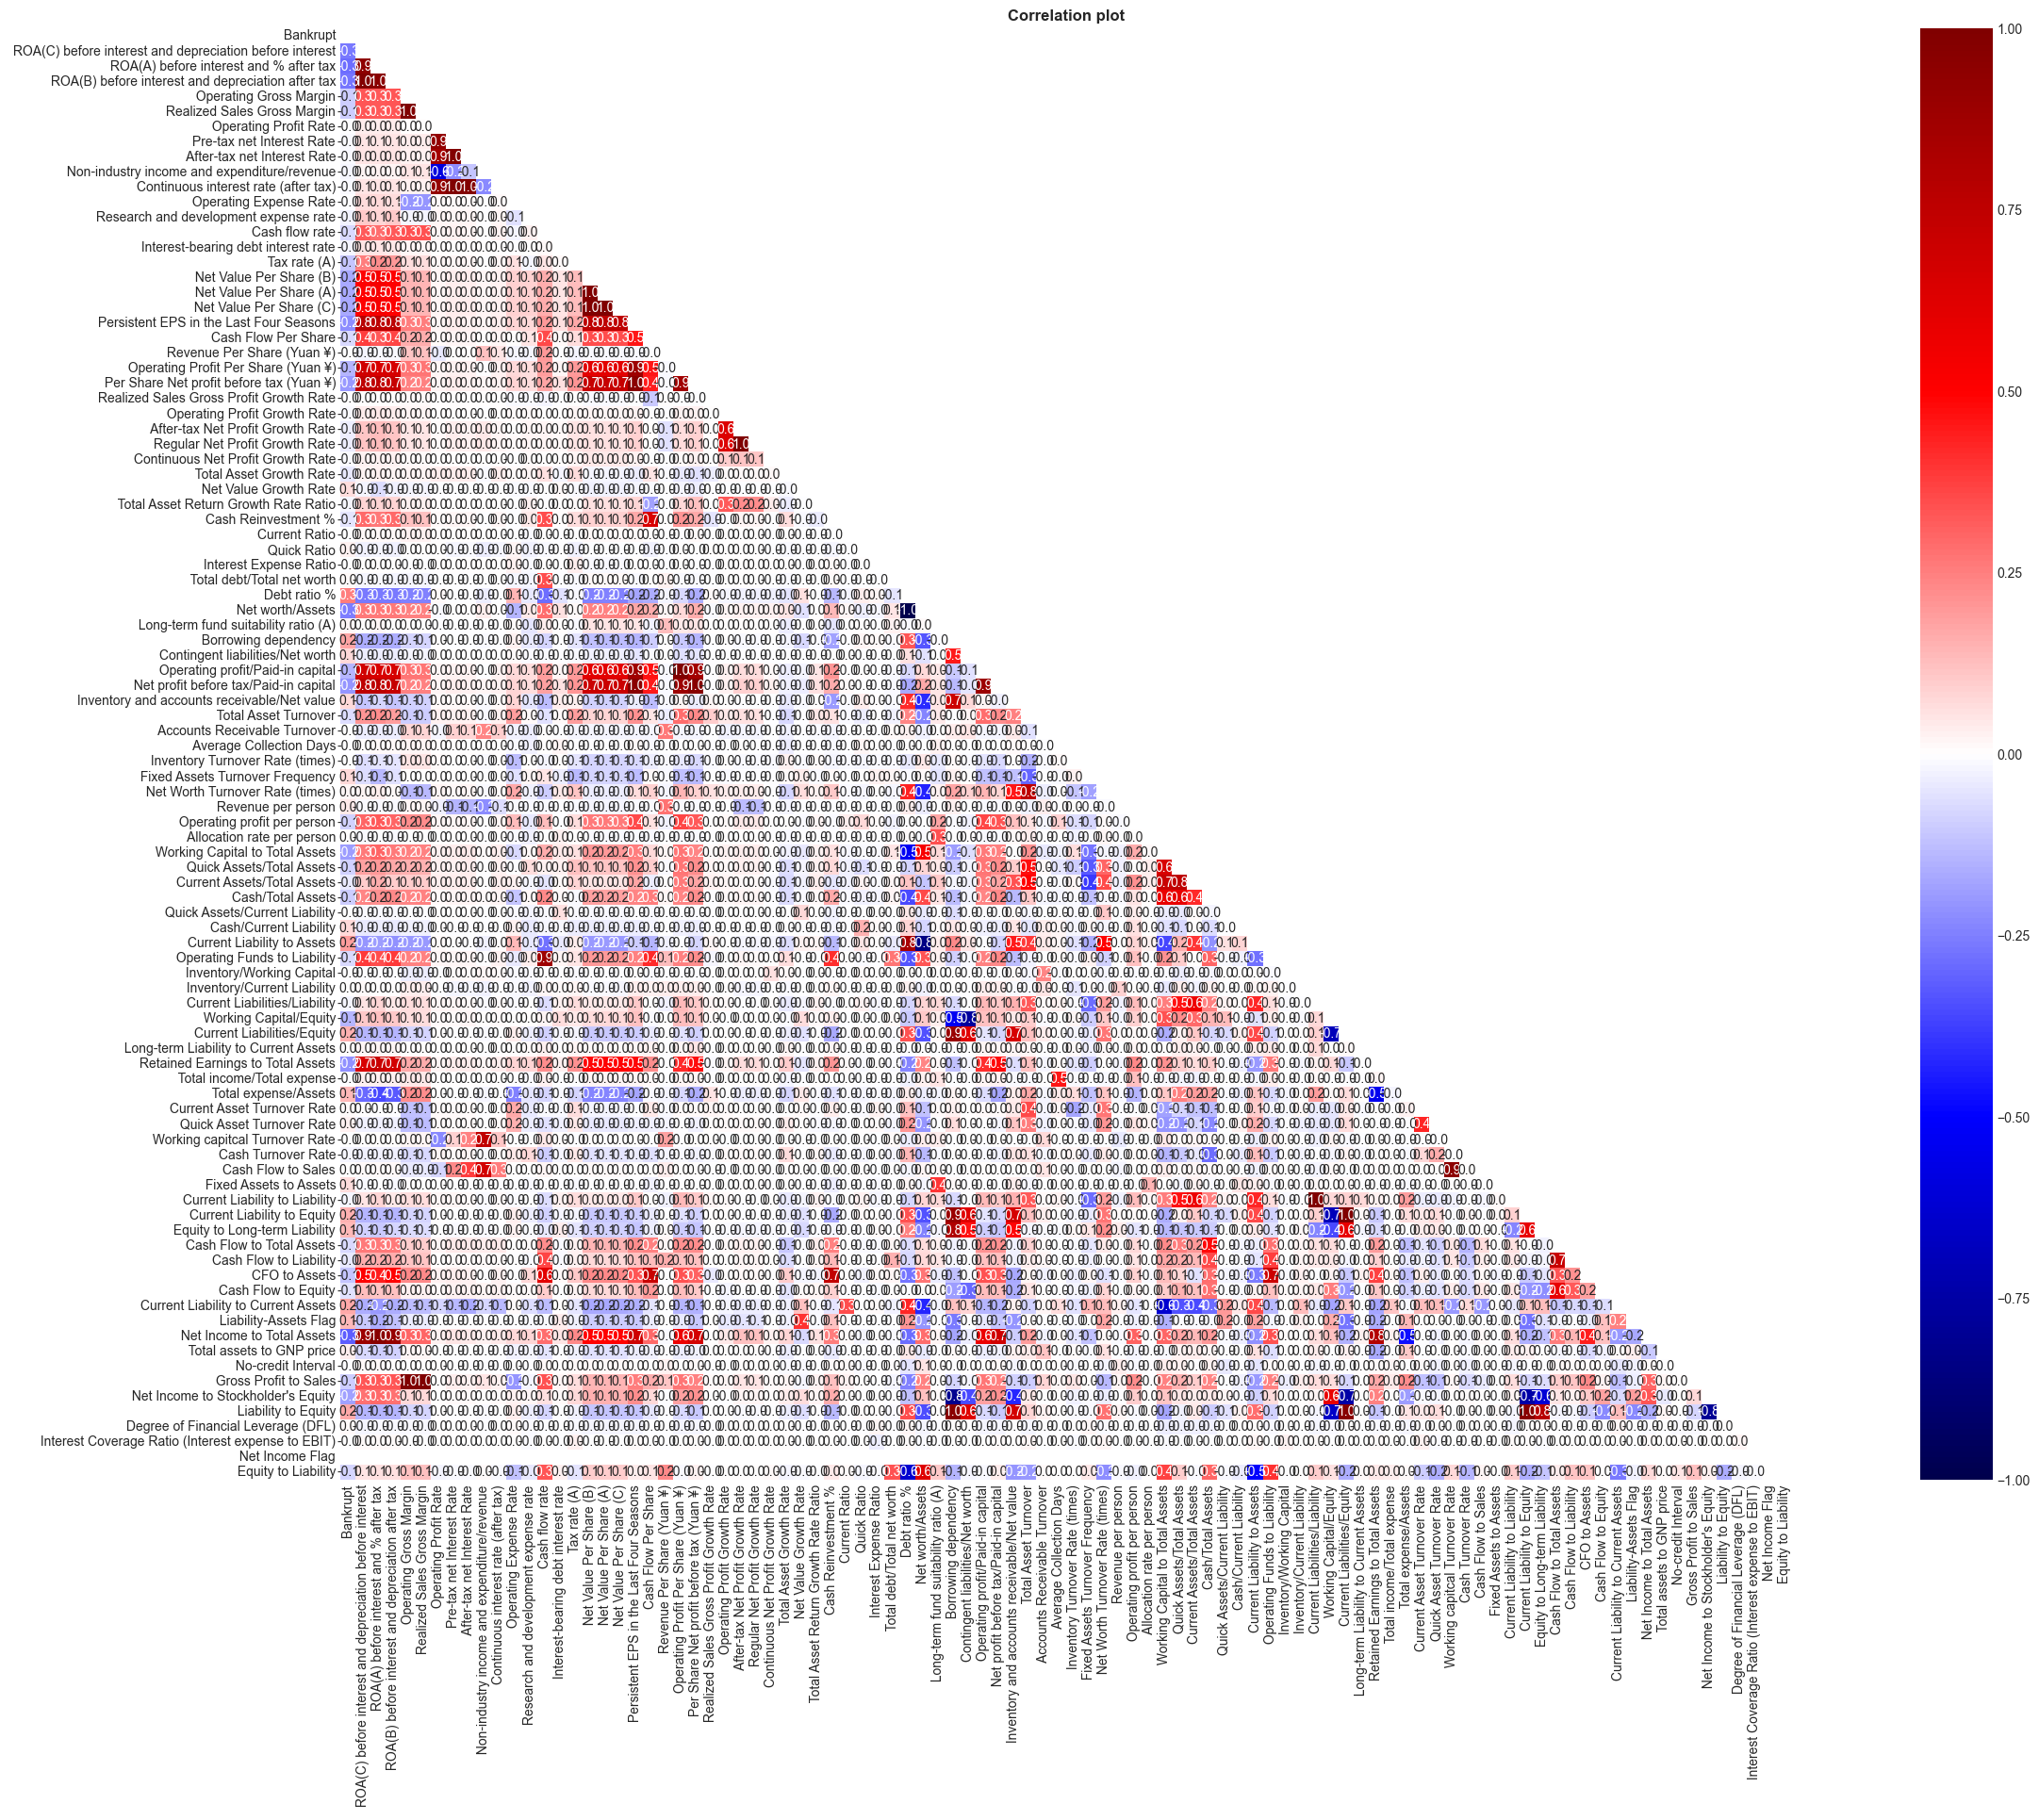

In [24]:
cor_mat = df.corr()

plt.figure(figsize=(35,20))
plt.title('Correlation plot', fontweight='bold')
mask = np.triu(np.ones_like(cor_mat, dtype=bool))
sns.heatmap(cor_mat, square=True, annot=True, cmap='seismic', mask=mask, fmt='.1f')

##### 1. Why did you pick the specific chart?

Answer Here.

to see correlation

##### 2. What is/are the insight(s) found from the chart?

Answer Here

most columns are highly related

#### Chart - 15 - Pair Plot 

In [25]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

to see the pairplot

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [26]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [27]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [28]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [29]:
# Handling Missing Values & Missing Value Imputation

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt                                                  6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [31]:
# Missing Value Count Function
def show_missing():
    missing = df.columns[df.isnull().any()].tolist()
    return missing

# Missing data counts and percentage
print('Missing Data Count')
print(df[show_missing()].isnull().sum().sort_values(ascending = False))
print('--'*50)
print('Missing Data Percentage')
print(round(df[show_missing()].isnull().sum().sort_values(ascending = False)/len(df)*100,2))

Missing Data Count
Series([], dtype: float64)
----------------------------------------------------------------------------------------------------
Missing Data Percentage
Series([], dtype: float64)


In [32]:
# Functions to address missing data

# Explore features
def feat_explore(column):
    return df[column].value_counts()

# Function to impute missing values
def feat_impute(column, value):
    df.loc[df[column].isnull(),column] = value

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

there are no null values

### 2. Handling Outliers

In [33]:
# Handling Outliers & Outlier treatments

In [34]:
#Capping the outlier rows with Percentiles
upper_lim = df[' Total Asset Growth Rate'].quantile(.90)
lower_lim = df[' Total Asset Growth Rate'].quantile(.22)
df.loc[(df[' Total Asset Growth Rate'] > upper_lim),' Total Asset Growth Rate'] = upper_lim
df.loc[(df[' Total Asset Growth Rate'] < lower_lim),' Total Asset Growth Rate'] = lower_lim

In [35]:
#Capping the outlier rows with Percentiles
upper_lim = df[' Contingent liabilities/Net worth'].quantile(.85)
lower_lim = df[' Contingent liabilities/Net worth'].quantile(.10)
df.loc[(df[' Contingent liabilities/Net worth'] > upper_lim),' Contingent liabilities/Net worth'] = upper_lim
df.loc[(df[' Contingent liabilities/Net worth'] < lower_lim),' Contingent liabilities/Net worth'] = lower_lim

In [36]:
#Capping the outlier rows with Percentiles
upper_lim = df[' Long-term Liability to Current Assets'].quantile(.85)

df.loc[(df[' Long-term Liability to Current Assets'] > upper_lim),' Long-term Liability to Current Assets'] = upper_lim


In [37]:
#Capping the outlier rows with Percentiles
upper_lim = df[' Current Asset Turnover Rate'].quantile(.79)

df.loc[(df[' Current Asset Turnover Rate'] > upper_lim),' Current Asset Turnover Rate'] = upper_lim


In [38]:
#Capping the outlier rows with Percentiles
upper_lim = df[' Equity to Long-term Liability'].quantile(.90)
lower_lim = df[' Equity to Long-term Liability'].quantile(.05)
df.loc[(df[' Equity to Long-term Liability'] > upper_lim),' Equity to Long-term Liability'] = upper_lim
df.loc[(df[' Equity to Long-term Liability'] < lower_lim),' Equity to Long-term Liability'] = lower_lim

In [39]:
import pandas as pd

# List of column names
columns = [
    ' ROA(C) before interest and depreciation before interest',
    ' ROA(A) before interest and % after tax',
    ' ROA(B) before interest and depreciation after tax',
    ' Operating Gross Margin',
    ' Realized Sales Gross Margin',
    ' Operating Profit Rate',
    ' Pre-tax net Interest Rate',
    ' After-tax net Interest Rate',
    ' Non-industry income and expenditure/revenue',
    ' Continuous interest rate (after tax)',
    ' Research and development expense rate',
    ' Tax rate (A)',
    ' Cash flow rate',
    ' Interest-bearing debt interest rate',
    
    ' Net Value Per Share (B)',
    ' Net Value Per Share (A)',
    ' Net Value Per Share (C)',
    ' Persistent EPS in the Last Four Seasons',
    ' Cash Flow Per Share',
    ' Revenue Per Share (Yuan ¥)',
    ' Operating Profit Per Share (Yuan ¥)',
    ' Per Share Net profit before tax (Yuan ¥)',
    ' Realized Sales Gross Profit Growth Rate',
    ' Operating Profit Growth Rate',
    ' After-tax Net Profit Growth Rate',
    ' Regular Net Profit Growth Rate',
    ' Continuous Net Profit Growth Rate',
    
    ' Net Value Growth Rate',
    ' Total Asset Return Growth Rate Ratio',
    ' Cash Reinvestment %',
    ' Current Ratio',
    ' Quick Ratio',
    ' Interest Expense Ratio',
    ' Total debt/Total net worth',
    ' Debt ratio %',
    ' Net worth/Assets',
    ' Long-term fund suitability ratio (A)',
    ' Borrowing dependency',
    
    ' Operating profit/Paid-in capital',
    ' Net profit before tax/Paid-in capital',
    ' Inventory and accounts receivable/Net value',
    ' Total Asset Turnover',
    ' Accounts Receivable Turnover',
    ' Average Collection Days',
    
    ' Fixed Assets Turnover Frequency',
    ' Net Worth Turnover Rate (times)',
    ' Revenue per person',
    ' Operating profit per person',
    ' Allocation rate per person',
    ' Working Capital to Total Assets',
    ' Quick Assets/Total Assets',
    ' Current Assets/Total Assets',
    ' Cash/Total Assets',
    ' Quick Assets/Current Liability',
    ' Cash/Current Liability',
    ' Current Liability to Assets',
    ' Operating Funds to Liability',
    ' Inventory/Working Capital',
    ' Inventory/Current Liability',
    ' Current Liabilities/Liability',
    ' Working Capital/Equity',
    ' Current Liabilities/Equity',
    
    ' Retained Earnings to Total Assets',
    ' Total income/Total expense',
    ' Total expense/Assets',
    
    
    ' Working capitcal Turnover Rate',
    
    ' Cash Flow to Sales',
    ' Fixed Assets to Assets',
    ' Current Liability to Liability',
    ' Current Liability to Equity',
    
    ' Cash Flow to Total Assets',
    ' Cash Flow to Liability',
    ' CFO to Assets',
    ' Cash Flow to Equity',
    ' Current Liability to Current Assets',
    
    ' Net Income to Total Assets',
    ' Total assets to GNP price',
    ' No-credit Interval',
    ' Gross Profit to Sales',
    " Net Income to Stockholder's Equity",
    ' Liability to Equity',
    ' Degree of Financial Leverage (DFL)',
    ' Interest Coverage Ratio (Interest expense to EBIT)',
    
    ' Equity to Liability',' Inventory Turnover Rate (times)',' Quick Asset Turnover Rate',' Cash Turnover Rate', ' Research and development expense rate',' Operating Expense Rate'
]

# Capping function using percentiles
def cap_outliers(df, column):
    upper_lim = df[column].quantile(0.85)
    lower_lim = df[column].quantile(0.10)
    df.loc[df[column] > upper_lim, column] = upper_lim
    df.loc[df[column] < lower_lim, column] = lower_lim

# Loop through each column and cap outliers
for column in columns:
    cap_outliers(df, column)


##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

I used  Percentiles to trim the outliers

### 3. Categorical Encoding

In [40]:
# Encode your categorical columns

 

In [41]:
df.dtypes

Bankrupt                                                      int64
 ROA(C) before interest and depreciation before interest    float64
 ROA(A) before interest and % after tax                     float64
 ROA(B) before interest and depreciation after tax          float64
 Operating Gross Margin                                     float64
                                                             ...   
 Liability to Equity                                        float64
 Degree of Financial Leverage (DFL)                         float64
 Interest Coverage Ratio (Interest expense to EBIT)         float64
 Net Income Flag                                              int64
 Equity to Liability                                        float64
Length: 96, dtype: object

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

no encoding is used as all columns are integer or float

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [42]:
# Expand Contraction

#### 2. Lower Casing

In [43]:
# Lower Casing

#### 3. Removing Punctuations

In [44]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [45]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [46]:
# Remove Stopwords

In [47]:
# Remove White spaces

#### 6. Rephrase Text

In [48]:
# Rephrase Text

#### 7. Tokenization

In [49]:
# Tokenization

#### 8. Text Normalization

In [50]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [51]:
# POS Taging

#### 10. Text Vectorization

In [52]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [53]:
# Manipulate Features to minimize feature correlation and create new features

In [54]:
import pandas as pd



# Calculate the correlation matrix
corr_matrix = df.corr()

# Find columns with correlation greater than or equal to 0.7
high_corr_cols = set()
columns = corr_matrix.columns

for i in range(len(columns)):
    for j in range(i):
        if corr_matrix.iloc[i, j] >= 0.99:
            colname_i = columns[i]
            colname_j = columns[j]
            high_corr_cols.add(colname_i)
            high_corr_cols.add(colname_j)

# Print the columns that are 99% correlated
print(len(high_corr_cols))


20


In [55]:
import pandas as pd

# Load your dataset into a pandas DataFrame
#df = pd.read_csv('your_dataset.csv')

# Exclude 'Bankrupt?' column from correlation analysis
exclude_column = 'Bankrupt'

# Calculate the correlation matrix
corr_matrix = df.drop(exclude_column, axis=1).corr().abs()

# Find columns with correlation greater than or equal to 0.7
high_corr_cols = set()
columns = corr_matrix.columns

for i in range(len(columns)):
    for j in range(i):
        if corr_matrix.iloc[i, j] >= 0.99:
            colname_i = columns[i]
            colname_j = columns[j]
            if colname_i != exclude_column and colname_j != exclude_column:
                high_corr_cols.add(colname_i)
                high_corr_cols.add(colname_j)

# Drop the columns with high correlation
df_filtered = df.drop(high_corr_cols, axis=1)

# Print the resulting DataFrame
#print(df_filtered)

len(df_filtered.columns)

74

#### 2. Feature Selection

In [56]:
# Select your features wisely to avoid overfitting

# Recursive Feature Elimination
# PCA

##### What all feature selection methods have you used  and why?

Answer Here.

 calculated the mutual information between the variables and the target

##### Which all features you found important and why?

Answer Here.

all the top 20 features I took

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [57]:
# Transform Your data

In [58]:
df_filtered.columns

Index(['Bankrupt', ' ROA(C) before interest and depreciation before interest',
       ' ROA(B) before interest and depreciation after tax',
       ' Operating Profit Rate', ' Pre-tax net Interest Rate',
       ' After-tax net Interest Rate',
       ' Non-industry income and expenditure/revenue',
       ' Continuous interest rate (after tax)', ' Operating Expense Rate',
       ' Research and development expense rate', ' Cash flow rate',
       ' Interest-bearing debt interest rate', ' Tax rate (A)',
       ' Persistent EPS in the Last Four Seasons', ' Cash Flow Per Share',
       ' Revenue Per Share (Yuan ¥)',
       ' Realized Sales Gross Profit Growth Rate',
       ' Operating Profit Growth Rate', ' Continuous Net Profit Growth Rate',
       ' Total Asset Growth Rate', ' Net Value Growth Rate',
       ' Total Asset Return Growth Rate Ratio', ' Cash Reinvestment %',
       ' Current Ratio', ' Quick Ratio', ' Interest Expense Ratio',
       ' Long-term fund suitability ratio (A)', ' Bor

In [59]:
#### If you want to check whether feature is guassian or normal distributed
import scipy.stats as stat
import pylab 
#### Q-Q plot
def plot_df_filtered(df_filtered,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df_filtered[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(df_filtered[feature],dist='norm',plot=pylab)
    plt.show()
    

In [61]:
import pandas as pd
from scipy import stats

# Assuming 'column_name' is the name of the column you want to transform
column_data = df_filtered[' After-tax net Interest Rate']

# Perform Box-Cox transformation on the column data
transformed_data, lamda = stats.boxcox(column_data)


In [62]:
lamda

5730.98213430583

In [63]:
import pandas as pd
from scipy import stats

# Assuming 'column_name' is the name of the column you want to transform
column_data = df_filtered[' Pre-tax net Interest Rate'
       ]

# Perform Box-Cox transformation on the column data
transformed_data1, lamda = stats.boxcox(column_data)

In [64]:
import pandas as pd
from scipy import stats

# Assuming 'dataset' is your DataFrame and 'column_name' is the name of the column you want to transform
column_data = df_filtered[' ROA(C) before interest and depreciation before interest']

# Perform Box-Cox transformation on the column data
transformed_data, lamda = stats.boxcox(column_data)

# Create a new column in the DataFrame with the transformed data
#dataset['transformed_column'] = transformed_data


In [65]:
import pandas as pd
import numpy as np

# Assuming 'column_name' is the name of the column you want to transform
column_data = df_filtered[' After-tax net Interest Rate']

# Apply logarithmic transformation to the column data
transformed_data1 = np.log(column_data)


In [66]:
import pandas as pd
from scipy import stats

# Create a copy of the DataFrame to store the transformed values
df_transformed = df_filtered.copy()

# Iterate over each column in the DataFrame
for column in df_filtered.columns:
    # Get the column data
    column_data = df_filtered[column]
    
    # Check if the column is constant
    if column_data.nunique() > 1:
        # Check if all values in the column are positive
        if column_data.min() > 0:
            # Perform Box-Cox transformation on the column data
            transformed_data, lambda_ = stats.boxcox(column_data)
            
            # Store the transformed values in the new DataFrame
            df_transformed[column] = transformed_data

# Print the transformed DataFrame
#print(df_transformed)


### 6. Data Scaling

In [67]:
from sklearn.model_selection import train_test_split

# to obtain the mutual information values
from sklearn.feature_selection import mutual_info_classif
# to select the features
from sklearn.feature_selection import SelectKBest

In [68]:
X = df_transformed.drop('Bankrupt',axis=1)  # dataframe
y = df_transformed['Bankrupt']              # series
print(type(X))
print(type(y))
print(X.shape,y.shape)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
(6819, 73) (6819,)


In [69]:
# HANDLING IMBALANCED DATASET WITH SMOTE

In [70]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority')
X,y = smote.fit_resample(X,y)

In [71]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(9898, 73)
(3300, 73)
(9898,)
(3300,)


In [72]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.metrics import roc_auc_score,roc_curve, auc

In [73]:
d = {'Model':[],'TP':[],'FN':[],'FP':[],'TN':[],'Acc':[],'AUC':[]}

def eval_model(model,model_name,x_test,ytest,ypred):
    cm = confusion_matrix(ytest,ypred)
    acc = accuracy_score(ytest,ypred)
    cls_rep = classification_report(ytest,ypred,zero_division=0)
    auc_score = roc_auc_score(y_test,model.predict_proba(x_test)[:,1])
    print('Confusion Matrix\n',cm)
    print('Accuracy Score',acc)
    print('AUC Score',auc_score)
    print('Classification Report\n',cls_rep)
    d['Model'].append(model_name)
    d['TP'].append(cm[0,0])
    d['FN'].append(cm[0,1])
    d['FP'].append(cm[1,0])
    d['TN'].append(cm[1,1])
    d['Acc'].append(acc)
    d['AUC'].append(auc_score)
    
    
def plot_roc_auc(model,ytest):
    fpr,tpr,thresh = roc_curve(y_test,model.predict_proba(x_test)[:,1])
    auc_score = roc_auc_score(y_test,model.predict_proba(x_test)[:,1])
    print('Area Under Curve',auc_score)
    plt.plot(fpr,tpr,color='orange')
    plt.plot([0,1],[0,1],label='TPR=FPR')
    plt.title('ROC_AUC Curve')
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.grid()
    plt.legend()
    plt.show()
    
def mscore(model):
    print('Training Score',model.score(x_train,y_train))  # Training dataset Accuracy
    print('Testing Score',model.score(x_test,y_test))     # Testing dataset accuracy

In [74]:
# calculate the mutual information between the variables and the target

# the smaller the value of the mi, the less information we can infer from
# the feature about the target

mi = mutual_info_classif(X_train, y_train)
mi

array([0.29971371, 0.30425239, 0.22139021, 0.00425626, 0.        ,
       0.        , 0.00333562, 0.16379017, 0.26997767, 0.16884117,
       0.31436657, 0.13290215, 0.42198322, 0.37625351, 0.07905713,
       0.06290993, 0.0533199 , 0.0032579 , 0.37554831, 0.21700629,
       0.03154051, 0.09483932, 0.1650955 , 0.20591135, 0.21176793,
       0.06580241, 0.22972208, 0.08834468, 0.04050463, 0.45297815,
       0.27127686, 0.03456831, 0.20952345, 0.17282478, 0.41670597,
       0.06930549, 0.20899108, 0.08495329, 0.13625715, 0.07216049,
       0.03863535, 0.12996312, 0.17885382, 0.13265108, 0.14769321,
       0.16552495, 0.00085036, 0.05100716, 0.11124482, 0.13332425,
       0.29051169, 0.2733811 , 0.04894564, 0.06757068, 0.19605754,
       0.00120773, 0.26920859, 0.        , 0.04261007, 0.12716583,
       0.12086604, 0.14035855, 0.12716108, 0.08705178, 0.16279239,
       0.        , 0.04088302, 0.        , 0.00347884, 0.25759142,
       0.21408702, 0.        , 0.23243903])

Text(0, 0.5, 'Mutual Information')

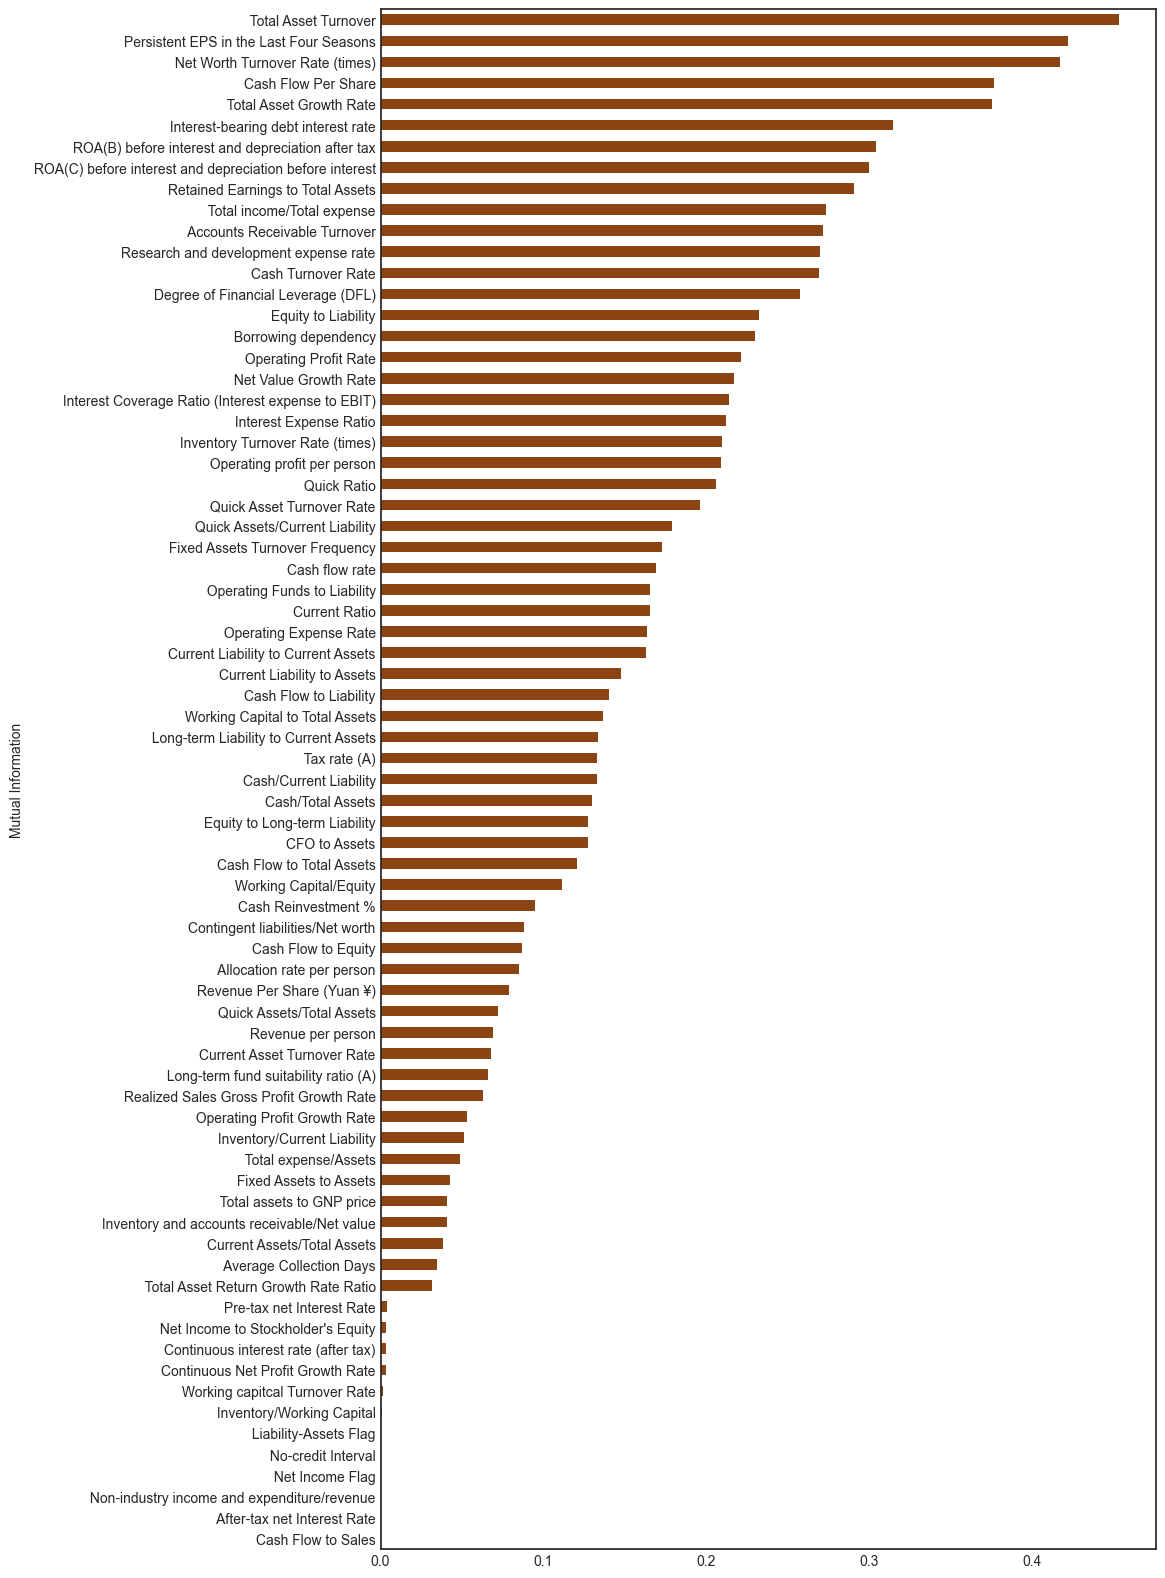

In [75]:
# 1) let's capture the above array in a pandas series
# 2) add the variable names in the index
# 3) sort the features based on their mutual information value
# 4) and make a var plot

mi = pd.Series(mi)
mi.index = X_train.columns
mi.sort_values(ascending=True).plot.barh(figsize=(10, 20), color = '#8B4513')
plt.ylabel('Mutual Information')

# Select top k features based on MI

In [76]:
# here we will select the top 10 features
# based on their mutual information value

# select features
top_features = SelectKBest(mutual_info_classif, k=50) # k = 10
sel_ = top_features.fit(X_train, y_train) 

# display features
X_train.columns[sel_.get_support()]

Index([' ROA(C) before interest and depreciation before interest',
       ' ROA(B) before interest and depreciation after tax',
       ' Operating Profit Rate', ' Operating Expense Rate',
       ' Research and development expense rate', ' Cash flow rate',
       ' Interest-bearing debt interest rate', ' Tax rate (A)',
       ' Persistent EPS in the Last Four Seasons', ' Cash Flow Per Share',
       ' Revenue Per Share (Yuan ¥)', ' Total Asset Growth Rate',
       ' Net Value Growth Rate', ' Cash Reinvestment %', ' Current Ratio',
       ' Quick Ratio', ' Interest Expense Ratio',
       ' Long-term fund suitability ratio (A)', ' Borrowing dependency',
       ' Contingent liabilities/Net worth', ' Total Asset Turnover',
       ' Accounts Receivable Turnover', ' Inventory Turnover Rate (times)',
       ' Fixed Assets Turnover Frequency', ' Net Worth Turnover Rate (times)',
       ' Revenue per person', ' Operating profit per person',
       ' Allocation rate per person', ' Working Capital

In [77]:
# Scaling your data

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler on the training data
scaler.fit(X_train)

# Apply the scaling transformation to both the training and test data
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


##### Which method have you used to scale you data and why?

i used standard scaler

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [78]:
# DImensionality Reduction (If needed)

In [79]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Step 1: Train and evaluate the model without dimensionality reduction
model_no_reduction = LogisticRegression()
model_no_reduction.fit(X_train, y_train)
y_pred_no_reduction = model_no_reduction.predict(X_test)
accuracy_no_reduction = accuracy_score(y_test, y_pred_no_reduction)

# Step 2: Train and evaluate the model with dimensionality reduction
pca = PCA(n_components=20)  # Set the desired explained variance ratio or number of components
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

model_with_reduction = LogisticRegression()
model_with_reduction.fit(X_train_pca, y_train)
y_pred_with_reduction = model_with_reduction.predict(X_test_pca)
accuracy_with_reduction = accuracy_score(y_test, y_pred_with_reduction)

# Step 3: Compare the accuracies
if accuracy_with_reduction > accuracy_no_reduction:
    print("Dimensionality reduction improved the model's accuracy.")
else:
    print("Dimensionality reduction did not improve the model's accuracy.")


Dimensionality reduction did not improve the model's accuracy.


In [80]:
variance_explained = pca.explained_variance_ratio_.sum()
variance_explained

nan

In [81]:
# Get the explained variance ratio
explained_variance = pca.explained_variance_ratio_

# Calculate the cumulative explained variance
cumulative_variance = explained_variance.cumsum()

In [82]:
explained_variance

array([nan, nan,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [83]:
cumulative_variance

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan])

# seeing how much data is extracted from the number of columns in pca taken

In [84]:
round(sum(list(pca.explained_variance_ratio_))*100, 2)

nan

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

pca

### 8. Data Splitting

In [85]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why? 

Answer Here.

i kept test size to 3o % and 70 % for training

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [86]:
# Handling Imbalanced Dataset (If needed)

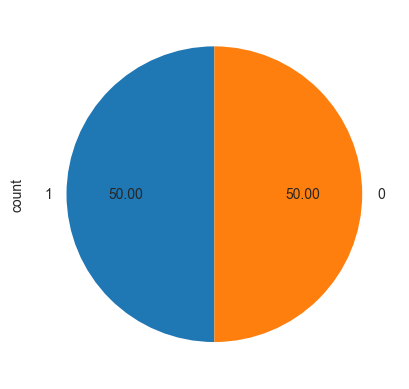

In [87]:
y.value_counts().plot(kind='pie',autopct="%.2f", startangle = 90)
plt.show()

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [88]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix

In [89]:
def Visualize_confusion_matrix(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(7, 5))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Oranges',
                xticklabels=['No Bankruptcy','Bankruptcy'], yticklabels=['No Bankruptcy','Bankruptcy'])
    plt.title('Accuracy: {0:.4f}'.format(accuracy_score(y_test, y_pred)))
    plt.ylabel('True Values')
    plt.xlabel('Predicted Values')
    plt.show()
    
    print("\n")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    return

# Logistic Regression

In [90]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

from sklearn.linear_model import LogisticRegression
LR_model = LogisticRegression(random_state = 0)
LR_model.fit(X_train, y_train)
y_pred = LR_model.predict(X_test)
acc1 = accuracy_score(y_test, y_pred)

In [91]:
# Train Score
train_score = LR_model.score(X_train, y_train)
print('Training Score: %0.4f'% train_score)

Training Score: 0.5007


In [92]:
# Test score
print('Recall score: %0.4f'% recall_score(y_test, y_pred))
print('Precision score: %0.4f'% precision_score(y_test, y_pred))
print('F1-Score: %0.4f'% f1_score(y_test, y_pred))
print('Accuracy score: %0.4f'% accuracy_score(y_test, y_pred))

Recall score: 0.0000
Precision score: 0.0000
F1-Score: 0.0000
Accuracy score: 0.4979


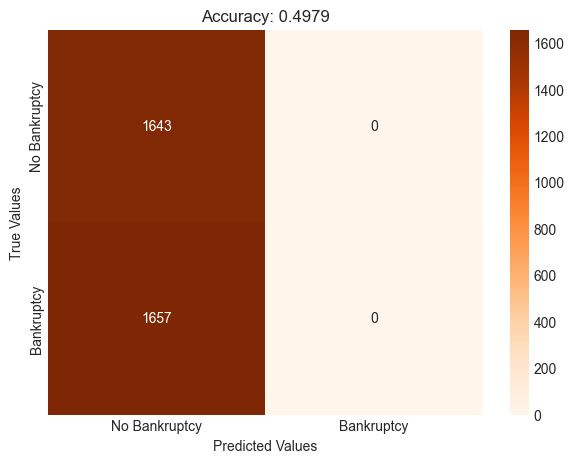



Classification Report:
              precision    recall  f1-score   support

           0       0.50      1.00      0.66      1643
           1       0.00      0.00      0.00      1657

    accuracy                           0.50      3300
   macro avg       0.25      0.50      0.33      3300
weighted avg       0.25      0.50      0.33      3300



In [93]:
# Test Predictions
Visualize_confusion_matrix(y_test, y_pred)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [94]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [95]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [96]:
# Visualizing evaluation Metric Score chart

# CatBoostClassifier

In [97]:
from catboost import CatBoostClassifier
catboost_model = CatBoostClassifier()
catboost_model.fit(X_train, y_train)
y_pred = catboost_model.predict(X_test)
acc8 = accuracy_score(y_test, y_pred)

Learning rate set to 0.027418
0:	learn: 0.6561210	total: 186ms	remaining: 3m 5s
1:	learn: 0.6224044	total: 211ms	remaining: 1m 45s
2:	learn: 0.5952796	total: 225ms	remaining: 1m 14s
3:	learn: 0.5656216	total: 239ms	remaining: 59.6s
4:	learn: 0.5403516	total: 255ms	remaining: 50.8s
5:	learn: 0.5169767	total: 270ms	remaining: 44.7s
6:	learn: 0.4986084	total: 287ms	remaining: 40.7s
7:	learn: 0.4777405	total: 303ms	remaining: 37.5s
8:	learn: 0.4578045	total: 321ms	remaining: 35.3s
9:	learn: 0.4408409	total: 337ms	remaining: 33.4s
10:	learn: 0.4250955	total: 352ms	remaining: 31.6s
11:	learn: 0.4097404	total: 368ms	remaining: 30.3s
12:	learn: 0.3972008	total: 382ms	remaining: 29s
13:	learn: 0.3856660	total: 398ms	remaining: 28s
14:	learn: 0.3745586	total: 413ms	remaining: 27.1s
15:	learn: 0.3645605	total: 431ms	remaining: 26.5s
16:	learn: 0.3554789	total: 448ms	remaining: 25.9s
17:	learn: 0.3462659	total: 464ms	remaining: 25.3s
18:	learn: 0.3365114	total: 480ms	remaining: 24.8s
19:	learn: 0.

In [98]:
# Train Score
train_score = catboost_model.score(X_train, y_train)
print('Training Score: %0.4f'% train_score)


Training Score: 1.0000


In [99]:
#Testing the CatBoost model on the Testing set

# Test score
print('Recall score: %0.4f'% recall_score(y_test, y_pred))
print('Precision score: %0.4f'% precision_score(y_test, y_pred))
print('F1-Score: %0.4f'% f1_score(y_test, y_pred))
print('Accuracy score: %0.4f'% accuracy_score(y_test, y_pred))

Recall score: 0.9909
Precision score: 0.9892
F1-Score: 0.9901
Accuracy score: 0.9900


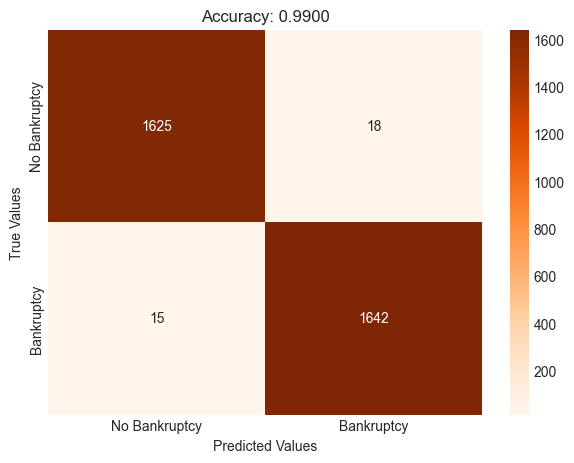



Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1643
           1       0.99      0.99      0.99      1657

    accuracy                           0.99      3300
   macro avg       0.99      0.99      0.99      3300
weighted avg       0.99      0.99      0.99      3300



In [100]:

# Test Predictions
Visualize_confusion_matrix(y_test, y_pred)

#### 2. Cross- Validation & Hyperparameter Tuning

In [101]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

used Bayesian Optimization

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

not much

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [102]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

# ANN

In [118]:
from tensorflow import keras
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [149]:
from tensorflow.keras.optimizers import Adam
optimizer=Adam(learning_rate=0.001)

In [150]:
from keras.losses import BinaryCrossentropy
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.losses import BinaryCrossentropy
from keras.metrics import Accuracy

# Assume you have your training data and labels as X_train and y_train, respectively
# Assume you have your testing data and labels as X_test and y_test, respectively

# Convert the labels to binary form if needed (e.g., 0 and 1)


# Create a sequential model
model = Sequential()
# Add input layer and hidden layer(s)
model.add(Dense(10, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(10, activation='relu'))

# Add output layer with a sigmoid activation for binary classification
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer=optimizer, loss=BinaryCrossentropy(), metrics=[Accuracy()])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
310/310 [==============================] - 2s 3ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 2/10
310/310 [==============================] - 1s 2ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 3/10
310/310 [==============================] - 1s 2ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 4/10
310/310 [==============================] - 1s 2ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 5/10
310/310 [==============================] - 1s 2ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 6/10
310/310 [==============================] - 1s 2ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 7/10
310/310 [==============================] - 1s 3ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 8/10
310/310 [==============================] - 1s 3ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 9/10
310/310 [==============================] - 1s 3ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 10/10
310/310 [==============================] - 1s 2ms/step - loss: nan - accuracy: 

In [129]:

# Add input layer and hidden layer(s)
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(64, activation='relu'))

# Add output layer with a sigmoid activation for binary classification
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss=BinaryCrossentropy(), metrics=[Accuracy()])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
310/310 [==============================] - 2s 3ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 2/10
310/310 [==============================] - 1s 3ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 3/10
310/310 [==============================] - 1s 2ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 4/10
310/310 [==============================] - 1s 3ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 5/10
310/310 [==============================] - 1s 3ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 6/10
310/310 [==============================] - 1s 3ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 7/10
310/310 [==============================] - 1s 3ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 8/10
310/310 [==============================] - 1s 3ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 9/10
310/310 [==============================] - 1s 3ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 10/10
310/310 [==============================] - 1s 3ms/step - loss: nan - accuracy: 

In [141]:
import pandas as pd

# Assuming your dataframe is named "df"
null_percentages = X_train.isnull().mean() * 100
top_10_columns = null_percentages.sort_values(ascending=False).head(10)

print("Top 10 columns with highest null percentages:")
print(top_10_columns)

AttributeError: 'numpy.ndarray' object has no attribute 'isnull'

In [126]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers


# Build the ANN model
model = keras.Sequential([
    layers.Dense(10, activation='relu', input_shape=(73,)),
    layers.Dense(10, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',  loss='binary_crossentropy',metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)


Epoch 1/100


ValueError: in user code:

    File "E:\New folder\envs\mito\lib\site-packages\keras\engine\training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "E:\New folder\envs\mito\lib\site-packages\keras\engine\training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "E:\New folder\envs\mito\lib\site-packages\keras\engine\training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "E:\New folder\envs\mito\lib\site-packages\keras\engine\training.py", line 1052, in train_step
        self._validate_target_and_loss(y, loss)
    File "E:\New folder\envs\mito\lib\site-packages\keras\engine\training.py", line 1016, in _validate_target_and_loss
        raise ValueError(

    ValueError: No loss found. You may have forgotten to provide a `loss` argument in the `compile()` method.


In [139]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense

# Create the input layer
input_layer = Dense(10, activation='relu')

# Create the hidden layer
hidden_layer = Dense(12, activation='relu')

# Create the output layer
output_layer = Dense(1, activation='sigmoid')

# Create the model
model = Sequential()
model.add(input_layer)
model.add(hidden_layer)
model.add(output_layer)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10)

# Evaluate the model
model.evaluate(X_test, y_test)


Epoch 1/10
310/310 [==============================] - 2s 3ms/step - loss: nan - accuracy: 0.5007
Epoch 2/10
310/310 [==============================] - 1s 2ms/step - loss: nan - accuracy: 0.5007
Epoch 3/10
310/310 [==============================] - 1s 3ms/step - loss: nan - accuracy: 0.5007
Epoch 4/10
310/310 [==============================] - 1s 3ms/step - loss: nan - accuracy: 0.5007
Epoch 5/10
310/310 [==============================] - 1s 3ms/step - loss: nan - accuracy: 0.5007
Epoch 6/10
310/310 [==============================] - 1s 3ms/step - loss: nan - accuracy: 0.5007
Epoch 7/10
310/310 [==============================] - 1s 2ms/step - loss: nan - accuracy: 0.5007
Epoch 8/10
310/310 [==============================] - 1s 2ms/step - loss: nan - accuracy: 0.5007
Epoch 9/10
310/310 [==============================] - 1s 2ms/step - loss: nan - accuracy: 0.5007
Epoch 10/10
104/104 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.4979


[nan, 0.4978787899017334]

In [138]:
df.isnull().sum(axis=0)

Bankrupt                                                    0
 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
 Operating Gross Margin                                     0
                                                           ..
 Liability to Equity                                        0
 Degree of Financial Leverage (DFL)                         0
 Interest Coverage Ratio (Interest expense to EBIT)         0
 Net Income Flag                                            0
 Equity to Liability                                        0
Length: 96, dtype: int64

In [135]:
X_train.isnull().sum

AttributeError: 'numpy.ndarray' object has no attribute 'isnull'

In [131]:
ANN_model = keras.Sequential([
    keras.layers.Dense(10,input_shape=(73,),activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
])

ANN_model.compile(
    optimizer='adam',
    metrics=['accuracy'],
    loss='binary_crossentropy'
)
ANN_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
310/310 [==============================] - 1s 2ms/step - loss: nan - accuracy: 0.5007
Epoch 2/100
310/310 [==============================] - 1s 2ms/step - loss: nan - accuracy: 0.5007
Epoch 3/100
310/310 [==============================] - 1s 2ms/step - loss: nan - accuracy: 0.5007
Epoch 4/100
310/310 [==============================] - 1s 2ms/step - loss: nan - accuracy: 0.5007
Epoch 5/100
310/310 [==============================] - 1s 3ms/step - loss: nan - accuracy: 0.5007
Epoch 6/100
310/310 [==============================] - 1s 3ms/step - loss: nan - accuracy: 0.5007
Epoch 7/100
310/310 [==============================] - 1s 2ms/step - loss: nan - accuracy: 0.5007
Epoch 8/100
310/310 [==============================] - 1s 2ms/step - loss: nan - accuracy: 0.5007
Epoch 9/100
310/310 [==============================] - 1s 3ms/step - loss: nan - accuracy: 0.5007
Epoch 10/100
310/310 [==============================] - 1s 2ms/step - loss: nan - accuracy: 0.5007
Epoch 11/100
310/31

# Predictions

# Train Predictions

# Test Predictions

# KNN

In [104]:
from sklearn.neighbors import KNeighborsClassifier
KNN_model = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
KNN_model.fit(X_train, y_train)
y_pred = KNN_model.predict(X_test)
acc3 = accuracy_score(y_test, y_pred)

In [105]:
# Train Score
train_score = KNN_model.score(X_train, y_train)
print('Training Score: %0.4f'% train_score)

Training Score: 0.8514


In [106]:
#Testing the KNN on the Testing set

# Test score
print('Recall score: %0.4f'% recall_score(y_test, y_pred))
print('Precision score: %0.4f'% precision_score(y_test, y_pred))
print('F1-Score: %0.4f'% f1_score(y_test, y_pred))
print('Accuracy score: %0.4f'% accuracy_score(y_test, y_pred))

Recall score: 0.8799
Precision score: 0.7718
F1-Score: 0.8223
Accuracy score: 0.8091


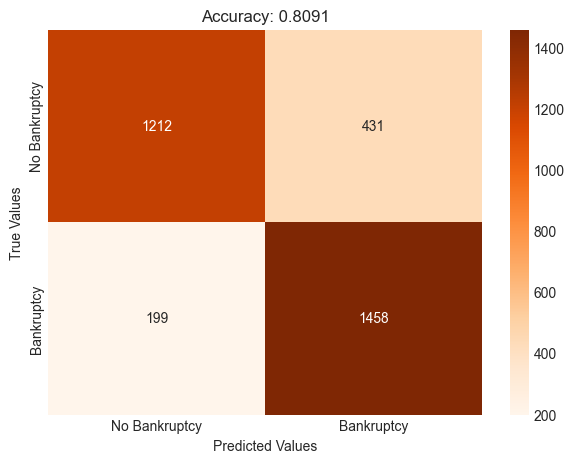



Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.74      0.79      1643
           1       0.77      0.88      0.82      1657

    accuracy                           0.81      3300
   macro avg       0.82      0.81      0.81      3300
weighted avg       0.82      0.81      0.81      3300



In [107]:

# Test Predictions
Visualize_confusion_matrix(y_test, y_pred)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [108]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [109]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

used GridSearchCV

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

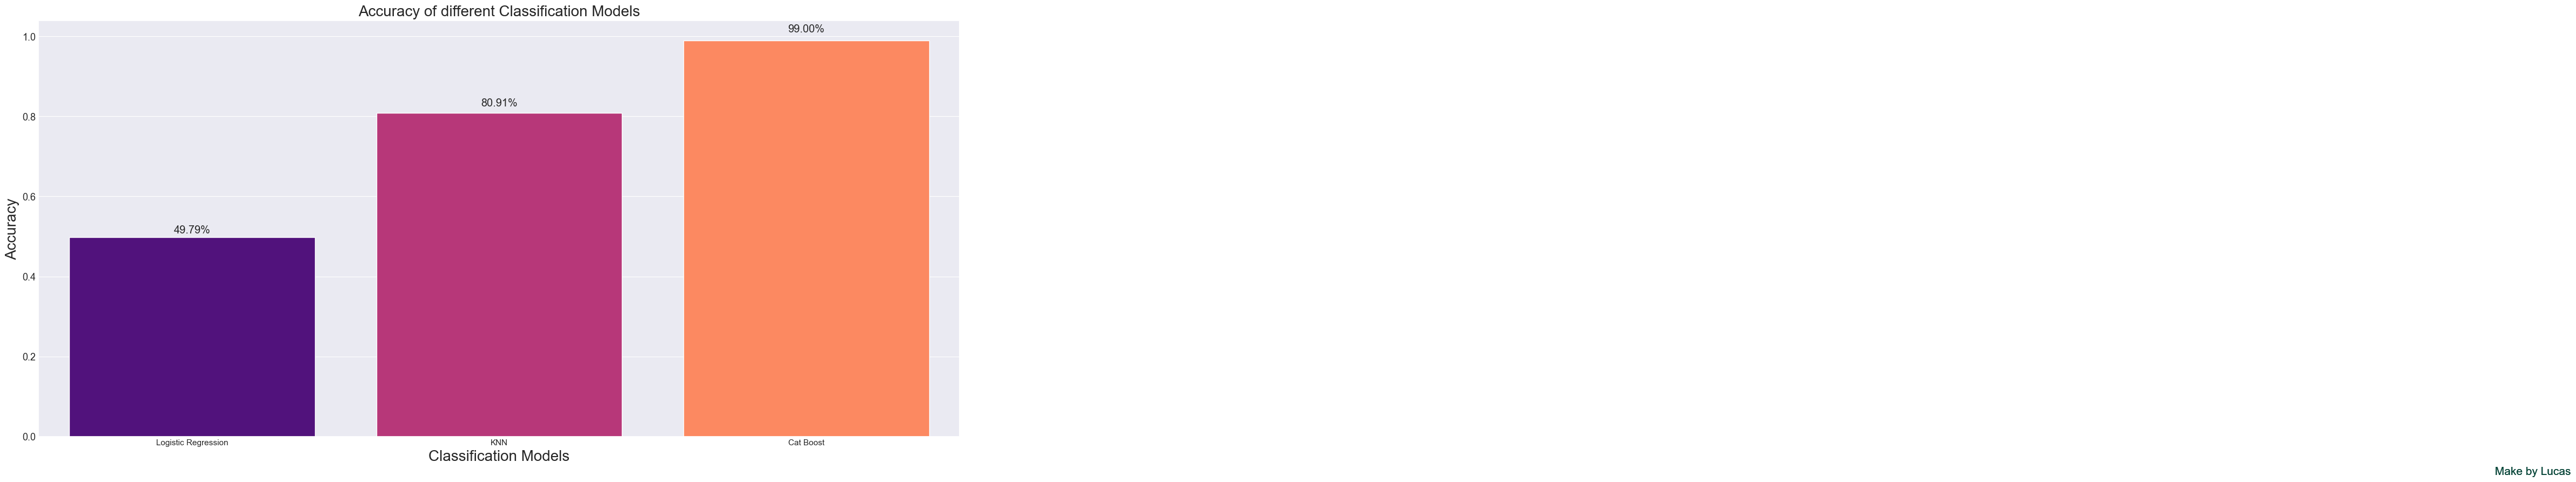

In [110]:
mylist=[]
mylist2=[]

mylist.append(acc1)
mylist2.append("Logistic Regression")
#mylist.append(acc2)
#mylist2.append("Naive Bayes")
mylist.append(acc3)
mylist2.append("KNN")
#mylist.append(acc4)
#mylist2.append("Decision Tree")
#mylist.append(acc5)
#mylist2.append("Random Forest")
#mylist.append(acc6)
#mylist2.append("SVM")
#mylist.append(acc7)
#mylist2.append("XG Boost")
mylist.append(acc8)
mylist2.append("Cat Boost")
#mylist.append(acc9)
#mylist2.append("ANN")

plt.figure(figsize=(22, 10))
sns.set_style("darkgrid")
ax = sns.barplot(x = mylist2, y = mylist, palette = "magma", saturation =1.5)
plt.xlabel("Classification Models", fontsize = 20 )
plt.ylabel("Accuracy", fontsize = 20)
plt.title("Accuracy of different Classification Models", fontsize = 20)
plt.xticks(fontsize = 11, horizontalalignment = 'center', rotation = 0)
plt.yticks(fontsize = 13)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.2%}', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')

    # Add Text watermark
    plt.text(7.5, -0.1, 'Make by Lucas', fontsize = 15,
             color ='#034235', ha ='left', va ='bottom',
             alpha = 0.7)
       
plt.show();

# ROC Curve and Area Under the Curve

In [111]:
from sklearn.metrics import roc_curve, auc

# ROC - Logistic Regression

In [112]:


y_pred_logistic = LR_model.predict_proba(X_test)[:,1]
logistic_fpr, logistic_tpr, threshold = roc_curve(y_test, y_pred_logistic)
auc_logistic = auc(logistic_fpr, logistic_tpr)

# ROC - CatBoost

In [113]:


y_pred_catboost = catboost_model.predict_proba(X_test)[:,1]
catboost_fpr, catboost_tpr, threshold = roc_curve(y_test, y_pred_catboost)
auc_catboost = auc(catboost_fpr, catboost_tpr)

# ROC - ANN

# ROC - KNN

In [114]:


y_pred_knn = KNN_model.predict_proba(X_test)[:,1]
knn_fpr, knn_tpr, threshold = roc_curve(y_test, y_pred_knn)
auc_knn = auc(knn_fpr, knn_tpr)

# ROC - Plotting Graph

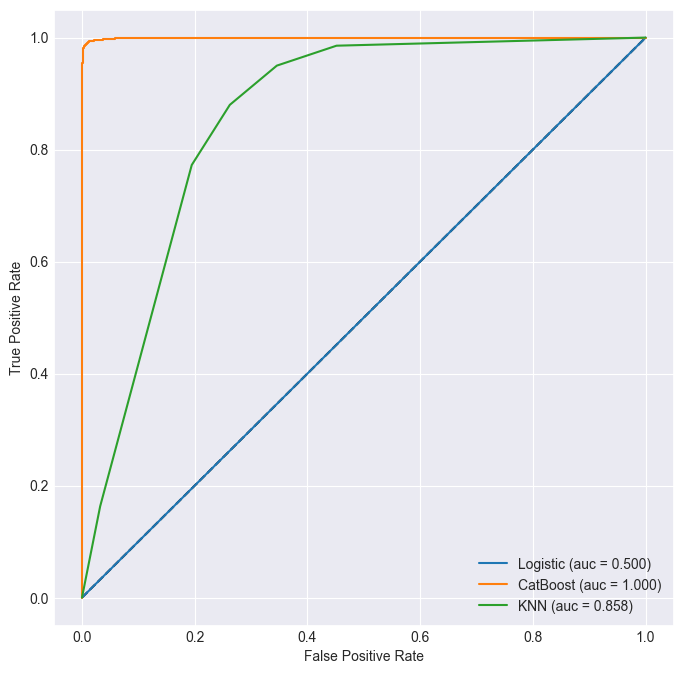

In [115]:


plt.figure(figsize=(8, 8), dpi=100)
plt.plot([0, 1], [0, 1], 'k--')
# Logistic Regression
plt.plot(logistic_fpr, logistic_tpr, label='Logistic (auc = %0.3f)' % auc_logistic)
# Random Forest
#plt.plot(rfc_fpr, rfc_tpr, label='Random Forest (auc = %0.3f)' % auc_rfc)
# ANN
#plt.plot(ann_fpr, ann_tpr, label='ANN (auc = %0.3f)' % auc_ann)
# CatBoost
plt.plot(catboost_fpr, catboost_tpr, linestyle='-', label='CatBoost (auc = %0.3f)' % auc_catboost)
# KNN
plt.plot(knn_fpr, knn_tpr, label='KNN (auc = %0.3f)' % auc_knn)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend(loc='best')
plt.show();

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

f1 score

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

catboost 

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [116]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [117]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***